In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

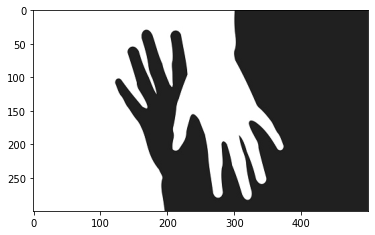

In [2]:
img = cv2.imread("../img/hand.jpg", cv2.IMREAD_GRAYSCALE)


plt.imshow(img, "gray")

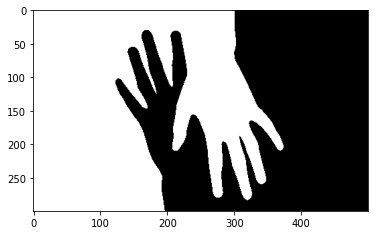

In [3]:
t, img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
img=img//255
plt.imshow(img,"gray")

Erosion

In [4]:
op = np.zeros((img.shape), np.float32)

In [5]:
# def _erosion(img, kernel):
#     kw = kernel.shape[1]//2
#     kh = kernel.shape[0]//2
#     op = np.zeros((img.shape), np.float32)
#     for i in range(kh,img.shape[0]-kh):
#         for  j in range(kw,img.shape[1]-kw):
        
#             flag = 1
#             for x in range(-kh, kh+1):
#                 for y in range(-kw, kw+1):
                    
#                     if (i+x)<img.shape[0] and (i+x)>=0 and (j+y)<img.shape[1] and (j+y)>=0:
                        
#                         if kernel[x+kh][y+kw]!=img[i+x][y+j]:
#                             flag=0
                            
#             if(flag==0):
#                 op[i, j]=0
#             else:
#                 op[i, j]=1
#     return op

In [6]:
def _erosion(img, kernel):
    kh = kernel.shape[0]//2
    kw = kernel.shape[1]//2
    op = np.zeros_like(img)
    m, n = img.shape


    for i in range(kh,m-kh):
        for j in range(kw,n-kw):
            flag = 1
            for x in range(-kh, kh+1):
                for y in range(-kw, kw+1):
                    if (i+x)<img.shape[0] and (i+x)>=0 and (j+y)<img.shape[1] and (j+y)>=0:
                        if kernel[x+kh][y+kw]==2:
                            continue
                        if kernel[x+kh][y+kw]!=img[i+x][j+y]:
                            flag=0
            if (flag):
                op[i][j]=1
            else:
                op[i][j]=0
    return op

In [7]:
def _dilation(img, kernel):
    kh = kernel.shape[0]//2
    kw = kernel.shape[1]//2
    op = np.zeros_like(img)
    m, n = img.shape


    for i in range(m):
        for j in range(n):
            flag = 0
            for x in range(-kh, kh+1):
                for y in range(-kw, kw+1):
                    if (i-x)<img.shape[0] and (i-x)>=0 and (j-y)<img.shape[1] and (j-y)>=0:
                        if kernel[x+kh][y+kw]==2:
                            continue
                        if kernel[x+kh][y+kw]==img[i-x][j-y]:
                            flag=1
            if (flag):
                op[i][j]=1
            else:
                op[i][j]=0
    return op

In [8]:
img = np.ones((5,6), np.uint8)
img[0,0]=img[0,1]=img[2:5,3:6]=0
print(img)
kernel = np.ones((3,3), np.uint8)
print(kernel)

[[0 0 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [9]:
output = _erosion(img, kernel)
print(output)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]]


In [10]:
img = np.zeros((5,6), np.uint8)
img[:,0:6:5]=img[0:5:4, :]=img[1,1] =img[1,4]=img[3,1]=img[3,4]= 1
print(img)
kernel = np.ones((3,1), np.uint8)
print(kernel)

[[1 1 1 1 1 1]
 [1 1 0 0 1 1]
 [1 0 0 0 0 1]
 [1 1 0 0 1 1]
 [1 1 1 1 1 1]]
[[1]
 [1]
 [1]]


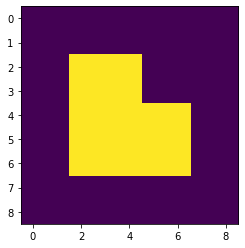

In [11]:
img = np.zeros((9,9), np.uint8)

img[2:7,2:5]=img[4:7,5:7]=1
# print(img)
kernel = np.zeros((3,3), np.uint8)
kernel[0,0]=kernel[0,2]=kernel[2,0]=kernel[2,2]=2
kernel[:,1]=kernel[1,:]=1
plt.imshow(kernel)
plt.imshow(img)

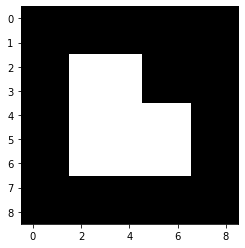

In [12]:
plt.imshow(img, "gray")

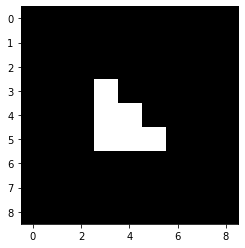

In [13]:
output = _erosion(img, kernel)
# print(output)
plt.imshow(output,"gray")
plt.show()
# output = _dilation(img, kernel)
# plt.imshow(output)

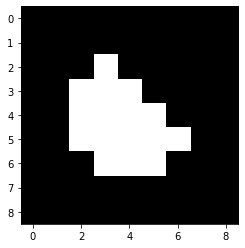

In [14]:
output = _dilation(output, kernel)
plt.imshow(output, "gray")

In [15]:
a = cv2.erode(img, kernel, iterations=1)
b = _erosion(img, kernel)
print(a==b)

[[ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True False  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]]
